# Wk18-Lecture01-CodeAlong: Preparing Time Series Data

## Learning Objectives

- By the end of this CodeAlong, students will be able to:
    - Create date time indices
    - Resample at various frequencies
    - Impute null values for time series 
    - Convert wide-form data to long-form
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])

# Datetime Objects

In Python, we will deal with 2 types of date/time objects:
- Python datetime
- Panda's datetime indices

In [3]:
import datetime as dt

In [4]:
# Get Today's date (ONLY) from python's datetime.date module
today_date = dt.date.today()
today_date

datetime.date(2023, 1, 31)

In [5]:
# Printed dt objects look very different!
print(today_date)

2023-01-31


In [6]:
# Get Today's date(&time) from python's datetime.datetime module
today_datetime = dt.datetime.today()
today_datetime

datetime.datetime(2023, 1, 31, 18, 10, 8, 490651)

In [7]:
print(today_datetime)

2023-01-31 18:10:08.490651


### Datetime Formats

- Datetime objects have a `.strftime()` method (string-format-time)

- 📖 **strftime cheat sheet: https://strftime.org/**
- 📖 **Official Table of Python datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes **


| Directive   | Meaning                                                                                                                                                                          | Example                                                                      |
|:------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------|
| %a          | Weekday as locale’s abbreviated name.                                                                                                                                            | Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)                              |
| %A          | Weekday as locale’s full name.                                                                                                                                                   | Sunday, Monday, …, Saturday (en_US); Sonntag, Montag, …, Samstag (de_DE)     |
| %w          | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 0, 1, …, 6                                                                   |
| %d          | Day of the month as a zero-padded decimal number.                                                                                                                                | 01, 02, …, 31                                                                |
| %b          | Month as locale’s abbreviated name.                                                                                                                                              | Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de_DE)                           |
| %B          | Month as locale’s full name.                                                                                                                                                     | January, February, …, December (en_US); Januar, Februar, …, Dezember (de_DE) |
| %m          | Month as a zero-padded decimal number.                                                                                                                                           | 01, 02, …, 12                                                                |
| %y          | Year without century as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 99                                                                |
| %Y          | Year with century as a decimal number.                                                                                                                                           | 0001, 0002, …, 2013, 2014, …, 9998, 9999                                     |
| %H          | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 23                                                                |
| %I          | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 01, 02, …, 12                                                                |
| %p          | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM, PM (en_US); am, pm (de_DE)                                               |
| %M          | Minute as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %S          | Second as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %f          | Microsecond as a decimal number, zero-padded to 6 digits.                                                                                                                        | 000000, 000001, …, 999999                                                    |
| %z          | UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).                                                                                                 | (empty), +0000, -0400, +1030, +063415, -030712.345216                        |
| %Z          | Time zone name (empty string if the object is naive).                                                                                                                            | (empty), UTC, GMT                                                            |
| %j          | Day of the year as a zero-padded decimal number.                                                                                                                                 | 001, 002, …, 366                                                             |
| %U          | Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %W          | Week number of the year (Monday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Monday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %c          | Locale’s appropriate date and time representation.                                                                                                                               | Tue Aug 16 21:30:00 1988 (en_US); Di 16 Aug 21:30:00 1988 (de_DE)            |
| %x          | Locale’s appropriate date representation.                                                                                                                                        | 08/16/88 (None); 08/16/1988 (en_US); 16.08.1988 (de_DE)                      |
| %X          | Locale’s appropriate time representation.                                                                                                                                        | 21:30:00 (en_US); 21:30:00 (de_DE)                                           |
| %%          | A literal '%' character.                                                                                                                                                         | %                                                                            |

In [8]:
## How to make a markdown table from a csv
# freq_codes = pd.read_csv('Reference-Python-Frequency-Codes.csv', index_col=0)
# print(freq_codes.drop(columns=["Notes"]).to_markdown())

In [9]:
## Month/Day/Year 24Hour Time
mo_day_yr_24hr_time_fmt = "%m/%d/%Y %T"
today_dt_24hr_str = today_datetime.strftime(mo_day_yr_24hr_time_fmt)
today_dt_24hr_str

'01/31/2023 18:10:08'

In [10]:
## Monday/Day/Year 12 Hour Time (+AM/PM)
mo_day_yr_12hr_time_fmt =  "%m/%d/%Y %I:%M:%S %p"

today_dt_12hr_str = today_datetime.strftime(mo_day_yr_12hr_time_fmt)
today_dt_12hr_str

'01/31/2023 06:10:08 PM'

> `.strftime` returns a STRING

In [11]:
type(today_dt_24hr_str)

str

In [12]:
## But pd.to_datetime can do that for us! 
converted_date_pandas = pd.to_datetime(today_dt_24hr_str)
converted_date_pandas

Timestamp('2023-01-31 18:10:08')

> We will use pandas datetime objects/functions whenever possible, as they save us a lot of time!

### Comparing Python vs. Pandas Datetime Objects

In [13]:
## Python Datetime 
print(type(today_datetime))

## Displaying vs printing
display(today_datetime)
print(today_datetime)

<class 'datetime.datetime'>


datetime.datetime(2023, 1, 31, 18, 10, 8, 490651)

2023-01-31 18:10:08.490651


In [14]:
## Panda's Timestamp
print(type(converted_date_pandas))

## Displaying vs printing
display(converted_date_pandas)
print(converted_date_pandas)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2023-01-31 18:10:08')

2023-01-31 18:10:08


# Working with Time Series - Data with Regular Intervals

### Stock Data (S&P500)

- S&P 500 (Kibot) 
     - IVE S&P 500 1-min aggregate data from: http://www.kibot.com/free_historical_data.aspx

In [15]:
sp500_min_df = pd.read_csv('Data/stocks/sp500_ive_min_tick_bidask.csv')
sp500_min_df.head()

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52


## Using pd.to_datetime

- Powerful  (but slow) function for converting data to datetime.

In [16]:
%%time
## Make a datetime index using pd.to_datetime
sp500_min_df['Datetime'] = pd.to_datetime(sp500_min_df['Date']+' ' + sp500_min_df['Time'])
sp500_min_df

CPU times: user 12.1 s, sys: 37.2 ms, total: 12.1 s
Wall time: 12.1 s


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,Datetime
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,2018-01-02 09:29:00
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,2018-01-02 09:30:00
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,2018-01-02 09:31:00
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,2018-01-02 09:32:00
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,2018-01-02 09:33:00
...,...,...,...,...,...,...,...,...,...,...,...
445757,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49,2023-01-27 15:56:00
445758,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45,2023-01-27 15:57:00
445759,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47,2023-01-27 15:58:00
445760,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50,2023-01-27 15:59:00


- We can speed up the conversion by specifying the correct time format and setting `infer_datetime_format=False`

In [17]:
## Creating/testing our time format
fmt = "%m/%d/%Y %H:%M"
today_datetime.strftime(fmt)

'01/31/2023 18:10'

In [18]:
%%time
## Make a datetime index using pd.to_datetime & specifying the format  (to save gtime)
sp500_min_df['Datetime'] = pd.to_datetime(sp500_min_df['Date']+' ' + sp500_min_df['Time'],
                                          format=fmt,
                                         infer_datetime_format=False)
sp500_min_df

CPU times: user 597 ms, sys: 12.1 ms, total: 609 ms
Wall time: 608 ms


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,Datetime
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,2018-01-02 09:29:00
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,2018-01-02 09:30:00
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,2018-01-02 09:31:00
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,2018-01-02 09:32:00
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,2018-01-02 09:33:00
...,...,...,...,...,...,...,...,...,...,...,...
445757,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49,2023-01-27 15:56:00
445758,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45,2023-01-27 15:57:00
445759,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47,2023-01-27 15:58:00
445760,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50,2023-01-27 15:59:00


In [19]:
## Setting the datetime index
df_ts = sp500_min_df.set_index("Datetime")
df_ts

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
Datetime,,,,,,,,,,
2018-01-02 09:29:00,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
2018-01-02 09:30:00,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2018-01-02 09:31:00,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
2018-01-02 09:32:00,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
2018-01-02 09:33:00,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 15:56:00,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
2023-01-27 15:57:00,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
2023-01-27 15:58:00,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47


In [20]:
df_ts.index

DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=445762, freq=None)

In [21]:
## Only keeping Closing Ask/Bid
close_cols = [c for c in df_ts.columns if "Close" in c]
df_ts = df_ts[close_cols]
df_ts

,BidClose,AskClose
Datetime,,
2018-01-02 09:29:00,102.33,102.67
2018-01-02 09:30:00,102.52,102.53
2018-01-02 09:31:00,102.53,102.55
2018-01-02 09:32:00,102.58,102.59
2018-01-02 09:33:00,102.51,102.52
...,...,...
2023-01-27 15:56:00,154.48,154.49
2023-01-27 15:57:00,154.44,154.45
2023-01-27 15:58:00,154.46,154.47


In [22]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=445762, freq=None)

## 📈 Visualizing Our Time Series DataFrame

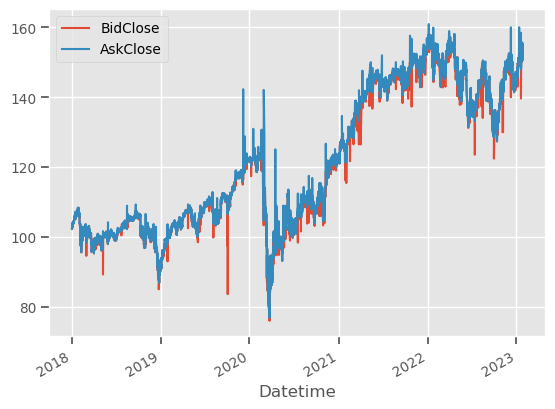

In [23]:
## let's visualize our dataframe 
ax = df_ts.plot()

> Time series visualizations usually require wider figures. 

### Changing Default Figure Size

In [24]:
# check default figsize in rcParams
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [25]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,5)

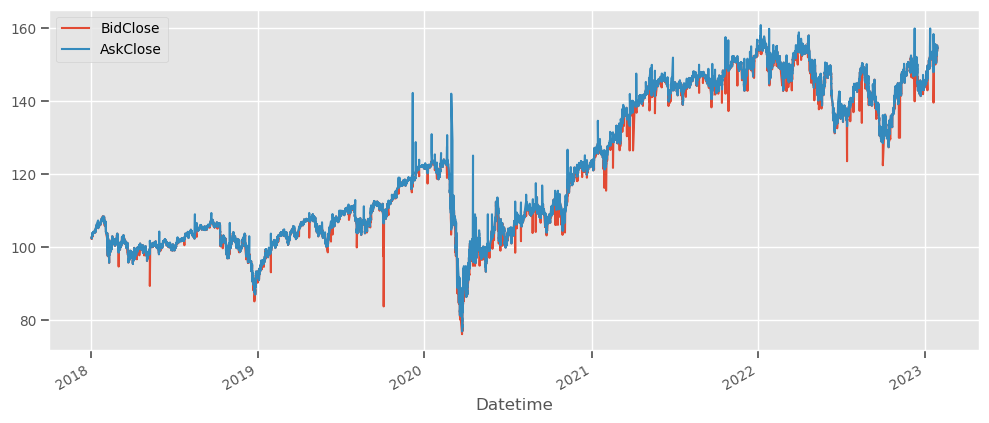

In [26]:
## recreate the plot
ax = df_ts.plot()

### Using Tick Date Formatters/Locators

- Let's add a minor xtick every 3 months.

In [27]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

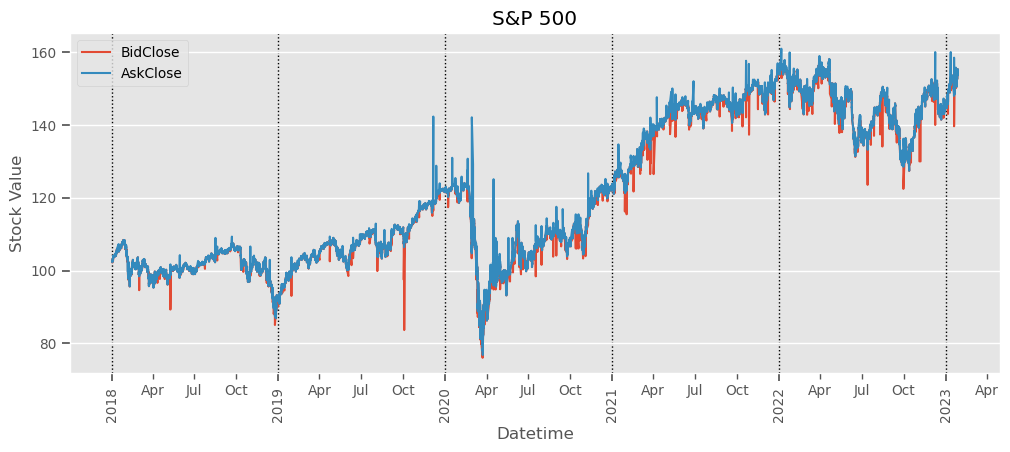

In [28]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

In [29]:
def format_xdates_stocks(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig


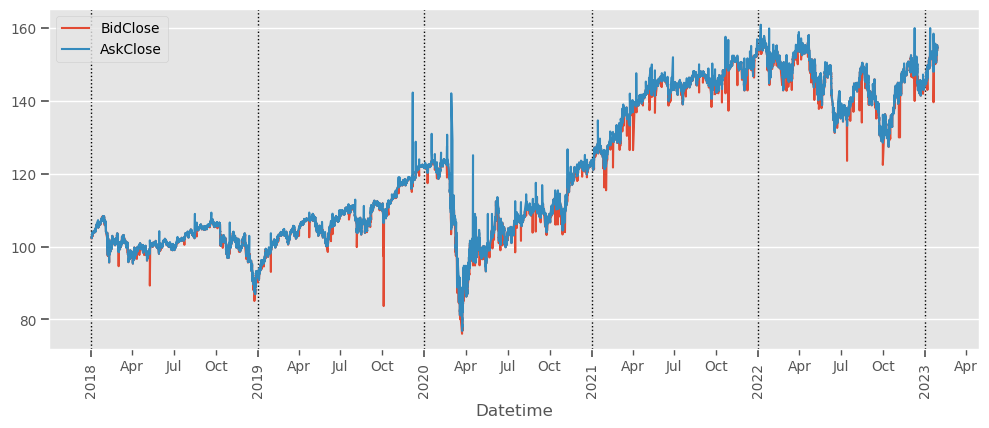

In [30]:
ax = df_ts.plot()
format_xdates_stocks(ax);

## Slicing (with a Datetime Index)

In [31]:
## Get all/any dates from 2022
df_ts.loc['2022']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-12-30 15:56:00,144.98,145.00
2022-12-30 15:57:00,144.99,145.00
2022-12-30 15:58:00,145.02,145.03


In [32]:
# Get all of january, 2022
df_ts.loc['January 2022']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-01-31 15:56:00,151.69,151.72
2022-01-31 15:57:00,151.74,151.77
2022-01-31 15:58:00,151.68,151.71


In [33]:
## Get January 01st, 2022 to March 16th 2022
df_ts.loc['01/01/22':'03/16/22']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-03-16 15:56:00,149.80,149.83
2022-03-16 15:57:00,149.76,149.78
2022-03-16 15:58:00,149.84,149.85


> Notice the earliest date is 2020-01-03

In [34]:
## Get just 01/03 - AskClose
df_ts.loc["01/03/2022", "AskClose"]

Datetime
2022-01-03 09:30:00   154.53
2022-01-03 09:31:00   154.44
2022-01-03 09:32:00   154.39
2022-01-03 09:33:00   154.55
2022-01-03 09:34:00   154.60
                       ...  
2022-01-03 15:56:00   154.86
2022-01-03 15:57:00   154.90
2022-01-03 15:58:00   154.86
2022-01-03 15:59:00   155.00
2022-01-03 16:00:00   155.02
Name: AskClose, Length: 352, dtype: float64

In [35]:
## cannot slice out more than 1 non-continuous dates
dates_to_keep = ['01/03/2022','01/05/2022']
try: 
    df_ts.loc[dates_to_keep]
except Exception as e:
    display(e)

KeyError("None of [Index(['01/03/2022', '01/05/2022'], dtype='object', name='Datetime')] are in the [index]")

In [36]:
## But can use multiple .loc's in a loop or list comprehension
sliced_ts = pd.concat([df_ts.loc[i] for i in dates_to_keep])
sliced_ts

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-01-05 15:56:00,155.50,155.51
2022-01-05 15:57:00,155.52,155.53
2022-01-05 15:58:00,155.52,155.54


## Selecting our TS for Resampling Demonstration

In [37]:
## Select the "AskClsoe" column for just 2020-2022 
ts = df_ts.loc["2020":"2022",'AskClose'].copy()
ts

Datetime
2020-01-02 09:30:00   122.72
2020-01-02 09:31:00   122.71
2020-01-02 09:32:00   122.65
2020-01-02 09:33:00   122.73
2020-01-02 09:34:00   122.64
                       ...  
2022-12-30 15:56:00   145.00
2022-12-30 15:57:00   145.00
2022-12-30 15:58:00   145.03
2022-12-30 15:59:00   145.11
2022-12-30 16:00:00   145.08
Name: AskClose, Length: 267331, dtype: float64

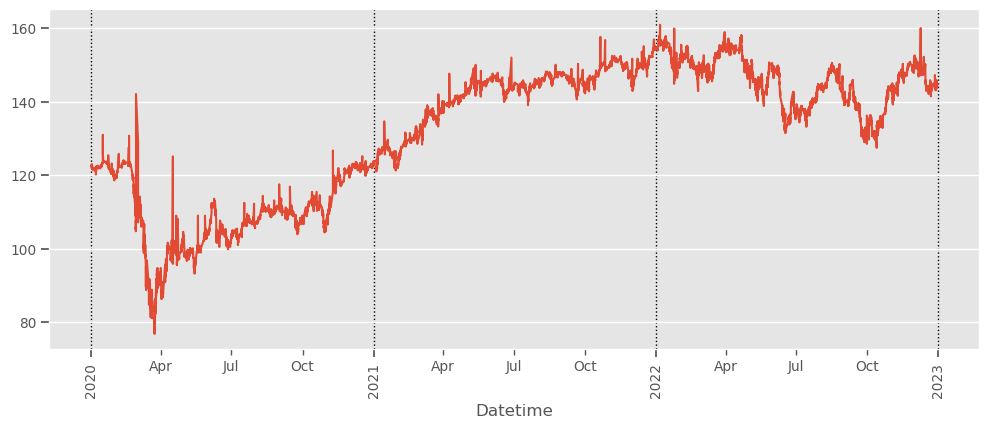

In [38]:
## visualize our selected ts
ax = ts.plot()
format_xdates_stocks(ax);

## Resampling

> Let's look at our ts.index and see if we can tell what frequency it should be.

In [39]:
## Check the index to guess the frequency
ts.index

DatetimeIndex(['2020-01-02 09:30:00', '2020-01-02 09:31:00',
               '2020-01-02 09:32:00', '2020-01-02 09:33:00',
               '2020-01-02 09:34:00', '2020-01-02 09:35:00',
               '2020-01-02 09:36:00', '2020-01-02 09:37:00',
               '2020-01-02 09:38:00', '2020-01-02 09:39:00',
               ...
               '2022-12-30 15:51:00', '2022-12-30 15:52:00',
               '2022-12-30 15:53:00', '2022-12-30 15:54:00',
               '2022-12-30 15:55:00', '2022-12-30 15:56:00',
               '2022-12-30 15:57:00', '2022-12-30 15:58:00',
               '2022-12-30 15:59:00', '2022-12-30 16:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=267331, freq=None)

>It looks like we have minute-resolution data (frequency = minutes).

### Resample as Minutes Frequency

- Let's resample the data to minute-frequency.
    - We need to look up the correct frequency code for minutes: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects 
    
- Once we know the code, let's try to use `.asfreq()` since we believe we already have data for every minute

In [40]:
## Resample using correct freq code and use .asfreq as agg emthod
ts_min = ts.resample("T").asfreq()
ts_min

Datetime
2020-01-02 09:30:00   122.72
2020-01-02 09:31:00   122.71
2020-01-02 09:32:00   122.65
2020-01-02 09:33:00   122.73
2020-01-02 09:34:00   122.64
                       ...  
2022-12-30 15:56:00   145.00
2022-12-30 15:57:00   145.00
2022-12-30 15:58:00   145.03
2022-12-30 15:59:00   145.11
2022-12-30 16:00:00   145.08
Freq: T, Name: AskClose, Length: 1574311, dtype: float64

In [41]:
ts_min.index

DatetimeIndex(['2020-01-02 09:30:00', '2020-01-02 09:31:00',
               '2020-01-02 09:32:00', '2020-01-02 09:33:00',
               '2020-01-02 09:34:00', '2020-01-02 09:35:00',
               '2020-01-02 09:36:00', '2020-01-02 09:37:00',
               '2020-01-02 09:38:00', '2020-01-02 09:39:00',
               ...
               '2022-12-30 15:51:00', '2022-12-30 15:52:00',
               '2022-12-30 15:53:00', '2022-12-30 15:54:00',
               '2022-12-30 15:55:00', '2022-12-30 15:56:00',
               '2022-12-30 15:57:00', '2022-12-30 15:58:00',
               '2022-12-30 15:59:00', '2022-12-30 16:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=1574311, freq='T')

### Resampling Often Creates Null Values

In [42]:
ts.isna().sum()

0

In [43]:
ts_min.isna().sum()

1306980

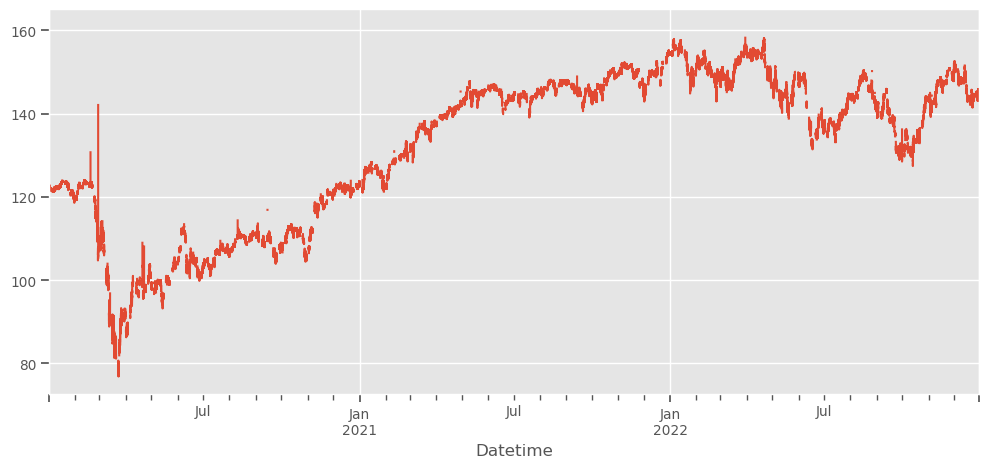

In [50]:
ts_min.plot();

# BOOKMARK

## ADMIN: SELECT `eda_ts`

In [51]:
idx_min_price = ts_min.idxmin()
idx_min_price

Timestamp('2020-03-23 15:35:00', freq='T')

- Make daily instead?

### Using Time Deltas

> We want to slice out a ts around the date with the minumum price. We want our slice to start 5 days before and end 5 days after.

In [52]:
try:
    idx_min_price +'5 days'
except Exception as e:
    print(e)

unsupported operand type(s) for +: 'Timestamp' and 'str'


In [53]:
## Making a time delta with pd.to_tiemdelta
delta_days = pd.to_timedelta('5 days')
delta_days

Timedelta('5 days 00:00:00')

In [54]:
## Subtracting our delta to get start
start = idx_min_price - delta_days
start

Timestamp('2020-03-18 15:35:00', freq='T')

In [55]:
## adding our time delta to get the end
end = idx_min_price + delta_days
end

Timestamp('2020-03-28 15:35:00', freq='T')

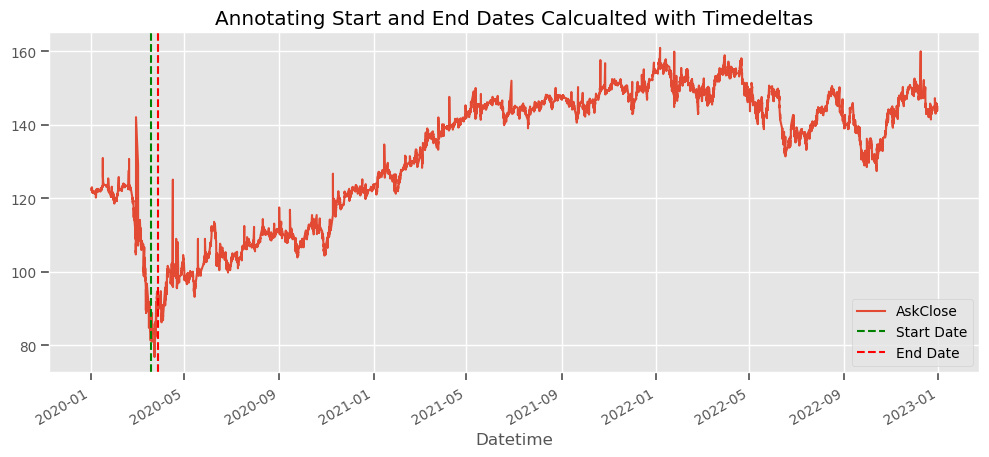

In [56]:
## Annotating the time period we've selected on our entire ts
ax = ts.plot(title="Annotating Start and End Dates Calcualted with Timedeltas");
ax.axvline(start,ls='--',color='green', label='Start Date')
ax.axvline(end, ls='--',color='red',label='End Date')
ax.legend()

In [57]:
## Slicing out the timeperiod and saving as eda_ts
eda_ts = ts.loc[start:end]#.resample("D").last()
eda_ts

Datetime
2020-03-18 15:35:00   82.63
2020-03-18 15:36:00   82.68
2020-03-18 15:37:00   82.41
2020-03-18 15:38:00   82.22
2020-03-18 15:39:00   82.32
                       ... 
2020-03-27 15:57:00   90.21
2020-03-27 15:58:00   90.16
2020-03-27 15:59:00   90.30
2020-03-27 16:00:00   90.28
2020-03-27 16:17:00   91.24
Name: AskClose, Length: 2773, dtype: float64

In [58]:
# plt.rcParams['lines.markeredgecolor']='white'
# plt.rcParams['lines.markersize']=3
# plt.rcParams['lines.linewidth']=3

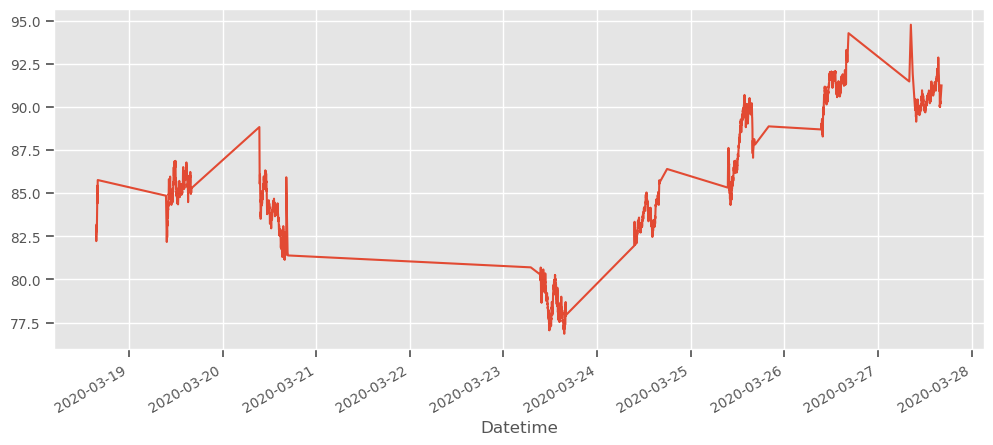

In [59]:
ax = eda_ts.plot()

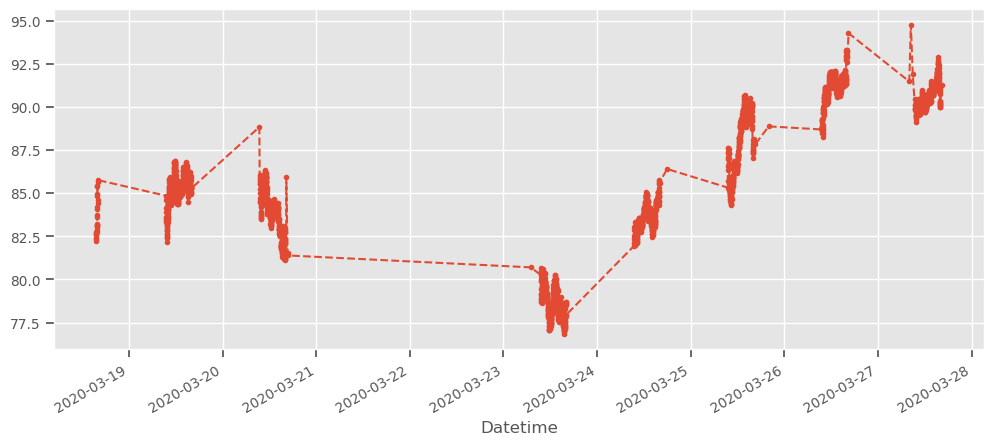

In [60]:
eda_ts.plot(style='.--');

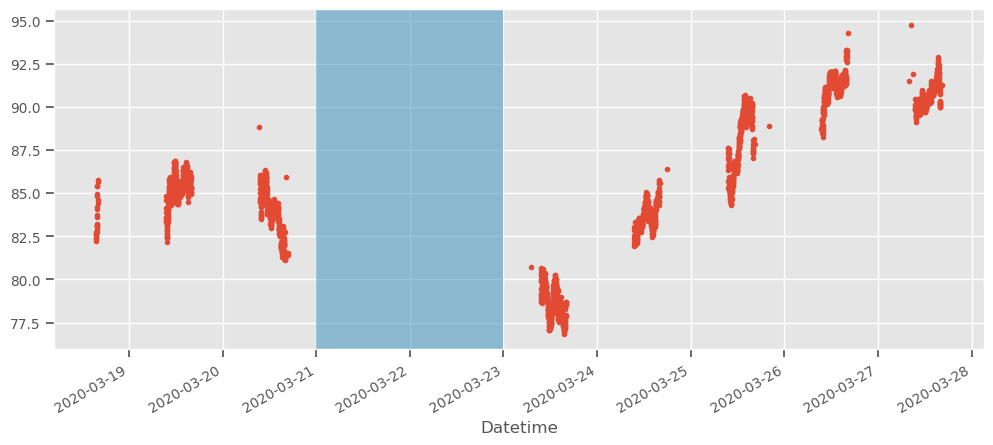

In [61]:
ax = eda_ts.plot(style='.');
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)

> Why does it look the way it does??

In [62]:
## There are no null values in the ts var...
eda_ts.isna().sum()

0

> What day of the week were the days missing data?

In [63]:
## what day of the week were the days missing data?
pd.to_datetime('2020-03-21').day_name()

'Saturday'

In [64]:
pd.to_datetime('2020-03-22').day_name()

'Sunday'

In [65]:
# what is our datetime index's frequency?
eda_ts.index

DatetimeIndex(['2020-03-18 15:35:00', '2020-03-18 15:36:00',
               '2020-03-18 15:37:00', '2020-03-18 15:38:00',
               '2020-03-18 15:39:00', '2020-03-18 15:40:00',
               '2020-03-18 15:41:00', '2020-03-18 15:42:00',
               '2020-03-18 15:43:00', '2020-03-18 15:44:00',
               ...
               '2020-03-27 15:52:00', '2020-03-27 15:53:00',
               '2020-03-27 15:54:00', '2020-03-27 15:55:00',
               '2020-03-27 15:56:00', '2020-03-27 15:57:00',
               '2020-03-27 15:58:00', '2020-03-27 15:59:00',
               '2020-03-27 16:00:00', '2020-03-27 16:17:00'],
              dtype='datetime64[ns]', name='Datetime', length=2773, freq=None)

<AxesSubplot: xlabel='Datetime'>

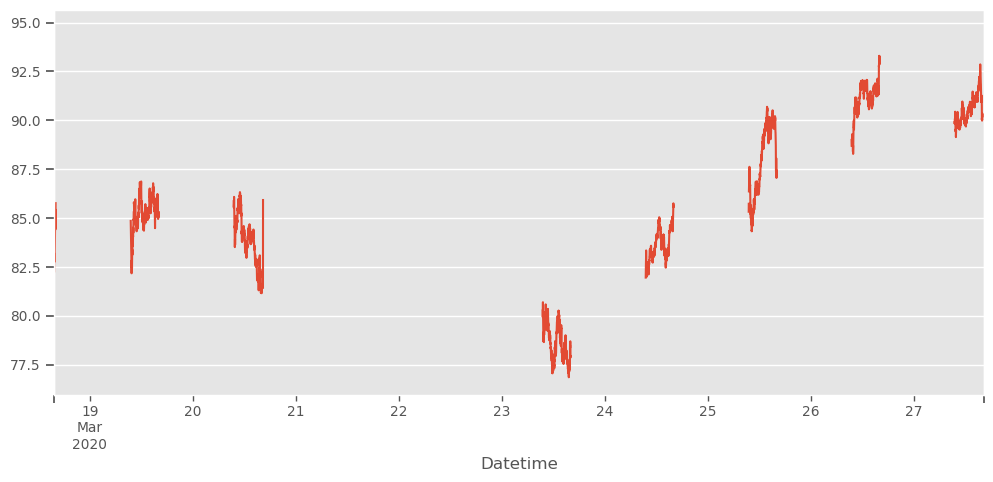

In [74]:
ts_min = eda_ts.resample("T").asfreq()
ts_min.plot()

## Imputing Null Values (time series)

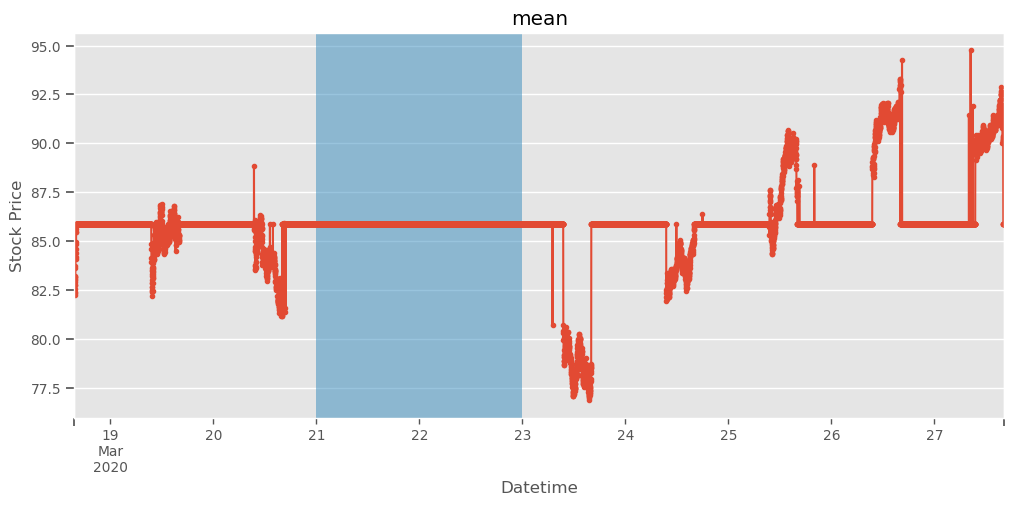

In [76]:

ax = ts_min.fillna(ts_min.mean()).plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title="mean", ylabel="Stock Price");

In [71]:
# ax = ts_min.fillna(ts_min.median()).plot(style='.-')
# ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
# ax.set(title="median", ylabel="Stock Price");

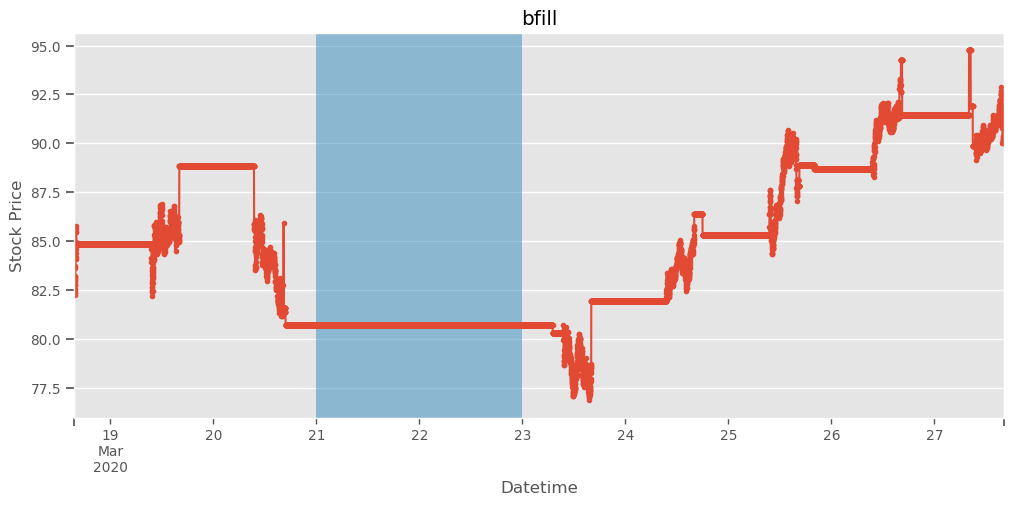

In [72]:
ax = ts_min.fillna(method='bfill').plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Stock Price");

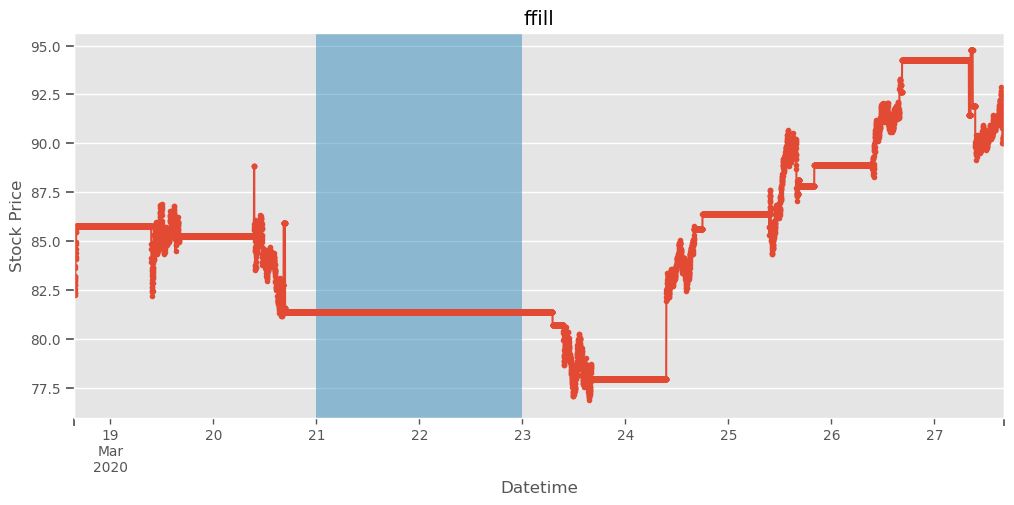

In [73]:
ax = ts_min.fillna(method='ffill').plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='ffill', ylabel="Stock Price");

In [ ]:
ts_temp = ts_min.interpolate()
ax = ts_temp.fillna(method='ffill').plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='ffill', ylabel="Stock Price");

>> Which method would be the best for stock market data?


# Working with Regular Time Series: Wide Format

In [ ]:
crypto = pd.read_csv("Data/stocks/wide-form-crypto.csv")
crypto

In [ ]:
id_vars = crypto.columns[:3]
id_vars

In [ ]:
long_crypto = pd.melt(crypto,id_vars=id_vars)
long_crypto

In [ ]:
long_crypto = pd.melt(crypto,id_vars=id_vars,var_name='Date',value_name="Value")
long_crypto

In [ ]:
long_crypto['Date'] = pd.to_datetime( long_crypto["Date"])
long_crypto

In [ ]:
# grouped_crypto = long_crypto.set_index(['CryptoCurrency','Date']).sort_index()
# grouped_crypto

In [ ]:
long_crypto = long_crypto.set_index('Date')
long_crypto

In [ ]:
long_crpyto.groupby('CryptoCurrency').resample("D").asfreq()

In [ ]:
crypto_ts = long_crypto.groupby('CryptoCurrency').resample("D").asfreq()['Value']
crypto_ts

In [ ]:
crypto_ts.plot();

> What are we seeing?

In [ ]:
crypto_unstacked = crypto_ts.unstack(0)
crypto_unstacked.plot();

# ✍️ Working with Data with Irregular Intervals
- NOTE: COPY OVER CODE FROM v2 

### UFO Sightings

- UFO Sightings: https://www.kaggle.com/datasets/NUFORC/ufo-sightings 

In [ ]:
ufo  = pd.read_csv("Data/ufos-kaggle/scrubbed.csv", low_memory=False, )
ufo

In [ ]:
ufo['date posted'] = pd.to_datetime(ufo["date posted"])
ufo

In [ ]:
try:
    ufo['datetime'] = pd.to_datetime(ufo["datetime"])
except Exception as e:
    display(e)

- Can use the `errors` argument for pd.to_datetime:
    - "raise" (default): raise an exception when errors happen
    - 'ignore': ignores the errors and returns the original value for that row. 
        - NOT RECOMMENDED: the entire column will not be datetime.
    - 'coerce': convert any bad datetime values to null values (NaT - NotATime)

In [ ]:
## saving a copy of original datetime column
ufo['datetime-original'] = ufo['datetime'].copy()
ufo

In [ ]:
##check nulls before coercing errors
ufo.isna().sum()

In [ ]:
## Creating datetime index 
ufo["datetime"] = pd.to_datetime(ufo["datetime-original"], errors='coerce')
ufo["datetime"]

In [ ]:
bad_dates =  ufo['datetime'].isna()
bad_dates.sum()

In [ ]:
ufo[bad_dates]

In [ ]:
ufo['fixed-datetime'] = ufo["datetime-original"].str.replace(" 24:00"," 23:59")
ufo

In [ ]:
ufo['datetime'] = pd.to_datetime(ufo["fixed-datetime"]) # not coercing errors
ufo

In [ ]:
# Set the datetime index and drop the other date cols
ufo_ts = ufo.set_index('datetime')
ufo_ts = ufo_ts.drop(columns=['datetime-original','fixed-datetime'])
ufo_ts

In [ ]:
# check the index to confirm its datetime
ufo_ts.index

# OLD UFO CODE

In [ ]:
ufo.columns

In [ ]:
# fix empty spaces in columns
ufo.columns = ufo.columns.str.strip()
ufo.columns

In [ ]:
ufo['year'] = ufo['datetime'].dt.year
ufo['month'] = ufo['datetime'].dt.month

In [ ]:
ufo['year']

In [ ]:
ufo['year'].min()

In [ ]:
# decades = pd.date_range(start="1900",end='2020',freq='10y',)

In [ ]:
ufo['year']

In [ ]:
ufo['decade'] = ufo['year']- ufo['year']%10
ufo

In [ ]:
miss.matrix(ufo)

In [ ]:
ufo['decade'].value_counts()

In [ ]:
import plotly.express as px

In [ ]:
ufo['duration (seconds)'] = pd.to_numeric(ufo['duration (seconds)'],errors='coerce')


In [ ]:
ufo = ufo.sort_values('decade')

In [ ]:
# ufo = ufo.dropna(subset=['datetime'])

In [ ]:
px.scatter_geo(data_frame=ufo, lat='latitude',lon='longitude', animation_frame="decade")

In [ ]:
ts = ufo.set_index('datetime').resample('d').size()
ts.plot()

In [ ]:
ufo = ufo.dropna(subset=['datetime'])

In [ ]:
ufo_ts = ufo.set_index("datetime")
ufo_ts

# APPENDIX

### Downsampling to Hourly Frequency

In [ ]:
## Try using .asfreq() when downsamping to Hourly,
ts.resample("H").asfreq()

> Notice the null values above:

In [ ]:
## Try using .last() when downsampling isntead
ts.resample("H").last()

> Since we have data every minute, taking whatever wast the last minute's price would be an appropriate aggregation method. 

In [ ]:
ts_H = ts.resample("H").last()
ts_H

In [ ]:
ts_H.plot()

In [ ]:
# ax = ts.plot(label='Original')
# # ts_min.plot(ax=ax, label='Resampled-Min.asfreq()');
# ts_H.plot(ax=ax, label='Resample-Hourly')
# ax.legend();

In [ ]:
eda_ts = ts.loc['01-2020':'09-2020']
eda_ts

In [ ]:
ax = eda_ts.plot(label='Original', style='.-')
eda_ts.resample("H").last().plot(ax=ax, label='Resampled-H.last()',
                                style='.-');
ax.legend();

In [ ]:
ax = eda_ts.plot(label='Original')
eda_ts.resample("T").mean().plot(ax=ax, label='Resampled');
ax.legend();

- Let's resample our ts as daily, weekly, and monthly to compare.

In [ ]:
freqs = ['D','W','M']


for freq in freqs:
    ax = eda_ts.plot(label='Original',  style='.-',
            title='Comparing Resampled Frequencies');

    ts_temp = eda_ts.resample(freq).last()
    ts_temp.plot(style='o-', label=freq,ax=ax)
    plt.legend()
    plt.show()